## Logistic Regression with numpy

### Classification vs Regresssion

#### Classification 

Classification is the task of predicting a discrete class label.

For example, an email of text can be classified as belonging to one of two classes: “spam“ and “not spam“.

- A classification problem requires that examples be classified into one of two or more classes.
- A classification can have real-valued or discrete input variables.
- A problem with two classes is often called a two-class or binary classification problem.
- A problem with more than two classes is often called a multi-class classification problem.
- A problem where an example is assigned multiple classes is called a multi-label classification problem.


#### Regression 

Regression is the task of predicting a continuous quantity.

For example, a house may be predicted to sell for a specific dollar value, perhaps in the range of $100,000 to $200,000.

- A regression problem requires the prediction of a quantity.
- A regression can have real valued or discrete input variables.
- A problem with multiple input variables is often called a multivariate regression problem.
- A regression problem where input variables are ordered by time is called a time series forecasting problem.

### Sigmoid Activation function

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. A standard choice for a sigmoid function is the logistic function shown in the figure and defined by the formula. A sigmoid function is a bounded, differentiable, real function that is defined for all real input values and has a non-negative derivative at each point. A sigmoid "function" and a sigmoid "curve" refer to the same object.
(Wiki).

\begin{align} 
\sigma(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}.
\end{align}

In [76]:
import numpy as np
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sigmoid function')

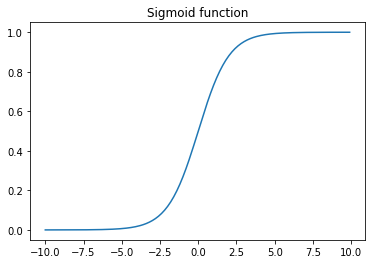

In [78]:
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.title('Sigmoid function')

#### Sigmoid function derivation

One of the main benifits of sigmoid funciton is it is easy to derivate.

\begin{align}
\sigma(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}.\\
\frac{d\sigma(𝑥)}{dx} = \frac{d\sigma(𝑥)}{dx}(1+e^{−𝑥})^{−1} \\
                      = −(1+𝑒^{−𝑥})^{−2}.(−𝑒−𝑥)
                      =\frac{𝑒^{−𝑥}}{(1+𝑒−𝑥)^{2}} \\
                      =\frac{1}{1+𝑒^{−𝑥}} ⋅\frac{𝑒^{−𝑥}}{1+𝑒^{−𝑥}}\\
 \frac{d\sigma(𝑥)}{dx}=\sigma(𝑥)⋅(1−\sigma(𝑥))
\end{align}

### Evaluation metrics

#### Accuracy 

Accuracy is the ratio of number of correct predictions to the total number of input samples.

\begin{align} 
Accuracy = \frac{Number Of Correct Predictions}{Total Number Of Predictions}
\end{align}

- Easy to understand for humans
- Cant deal with probabilities(so loss of some information).
- Hard to calculate derivative


#### Log loss (Cost fuction)
Logarithmic loss (related to cross-entropy) measures the performance of a classification model where the prediction input is a probability value between 0 and 1(Wiki).

\begin{align} 
log loss = -{(y\log(p) + (1 - y)\log(1 - p))}
\end{align}

- Easy to derive
- Can deal with probabilities
- hard to understand for humans.

<img src="files/imgs/Log_loss_graph.png">
<img src="files/imgs/Log_vs_neglog.gif">


### Logistic Regression

Logistic regression is same as linear regression with sigmoid activation function.

Linear regression equation:

\begin{equation} 
\hat{y} = b+ w0x0 + w1x1 + w2x2 + ...
\end{equation}

the above equation is works well for continous y value. For discrete we can use sigmoid function to convert this continous values into probabilities. The resulting equation looks like this

\begin{align} 
prediction = \sigma(\hat{y})
\end{align}

#### Training logistic regression model
- Calculate y hat and probabilites shown in the above equations.
- Calculate cost using binary log loss function.
- Calculate derivatives and perform gradient decent calculation.
- update weights until converged.

#### Binary log loss derivative

\begin{align} 
log loss = -{(y\log(\sigma(\hat{y})) - (1 - y)\log(1 - \sigma(\hat{y}))}\\
\frac {d(log loss)}{d\hat{y}} = \frac{-y}{\sigma(\hat{y})} \frac{d\sigma(\hat{y})}{d\hat{y}} + \frac{1-y}{1 - \sigma(\hat{y})} \frac{d\sigma(\hat{y})}{d\hat{y}} \\
      = (1 - \sigma(\hat{y}))(\frac{(1-y)\sigma(\hat{y})}{1-\sigma(\hat{y})} - y)\\
\frac {d(log loss)}{d\hat{y}}= \sigma(\hat{y}) -y
\end{align}

some parts of code is from this blog https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece

In [79]:
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X.dot(weights))
    epsilon = 1e-5 # adding small value to avoild log(0)
    cost = (1/m)*(((-y).T.dot(np.log(h + epsilon)))-((1-y).T.dot(np.log(1-h + epsilon))))
    return cost

In [80]:
## Performing gradient descent
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T.dot(sigmoid(X.dot(params)) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [81]:
from sklearn.datasets import make_classification

In [82]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

Text(0, 0.5, 'x[1]')

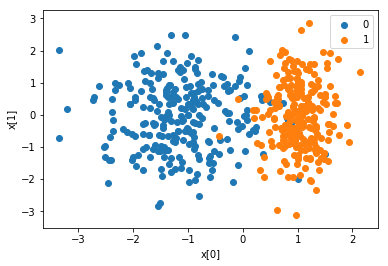

In [83]:
plt.scatter(x=X[np.squeeze(y==0)][:, 0], y=X[np.squeeze(y==0)][:, 1]) 
plt.scatter(x=X[np.squeeze(y==1)][:, 0], y=X[np.squeeze(y==1)][:, 1]) 
plt.legend(['0', '1'])
plt.xlabel('x[0]')
plt.ylabel('x[1]')

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



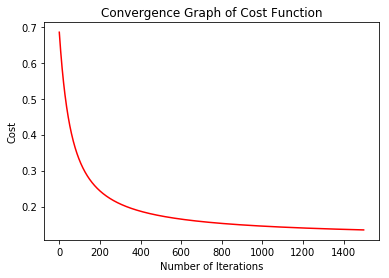

In [84]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
# sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [85]:
## to converting probabilites into classes
def predict(X, params):
    return np.round(sigmoid(X.dot(params)))

In [86]:
def accuracy(y_pred, y):
    return float(sum(y_pred == y))/ float(len(y))

In [87]:
y_pred = predict(X, params_optimal)
score = accuracy(y_pred, y)

print('Accuracy of the model: {}'.format(score))

Accuracy of the model: 0.966


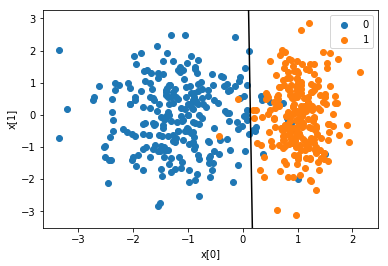

In [88]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])


plt.scatter(x=X[np.squeeze(y==0)][:, 1], y=X[np.squeeze(y==0)][:, 2]) 
plt.scatter(x=X[np.squeeze(y==1)][:, 1], y=X[np.squeeze(y==1)][:, 2]) 
plt.legend(['0', '1'])
plt.xlabel('x[0]')
plt.ylabel('x[1]')

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");